**Question 1**

In [1]:
import pandas as pd 
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [20]:
import pandas as pd
import plotly.express as px

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Remove rows with missing values in flipper_length_mm and species
penguins_clean = penguins.dropna(subset=['flipper_length_mm', 'species'])

# List of species
species_list = penguins_clean['species'].unique()

# Create histograms with location and scale markers
for species in species_list:
    # Filter data for the current species
    data_species = penguins_clean[penguins_clean['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean_val = data_species.mean()
    median_val = data_species.median()
    min_val = data_species.min()
    max_val = data_species.max()
    q1 = data_species.quantile(0.25)
    q3 = data_species.quantile(0.75)
    std_val = data_species.std()
    lower_2std = mean_val - 2 * std_val
    upper_2std = mean_val + 2 * std_val
    
    # Create histogram
    fig = px.histogram(data_species, nbins=30, title=f'Flipper Length Distribution for {species}',
                       labels={'value': 'Flipper Length (mm)'})
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean_val, line=dict(color='lightblue', dash='dash'), annotation_text='Mean', annotation_position="right")
    fig.add_vline(x=median_val, line=dict(color='green', dash='dash'), annotation_text='Median', annotation_position="top right")
    
    # Add vertical rectangles for range and interquartile range
    fig.add_vrect(x0=min_val, x1=max_val, line_width=0, fillcolor="red", opacity=0.1, annotation_text="Range", annotation_position="top left")
    fig.add_vrect(x0=q1, x1=q3, line_width=0, fillcolor="orange", opacity=0.1, annotation_text="IQR", annotation_position="bottom left")
    fig.add_vrect(x0=lower_2std, x1=upper_2std, line_width=0, fillcolor="yellow", opacity=0.1, annotation_text="2 Std Dev", annotation_position="bottom right")
    
    # Show plot
    fig.show()

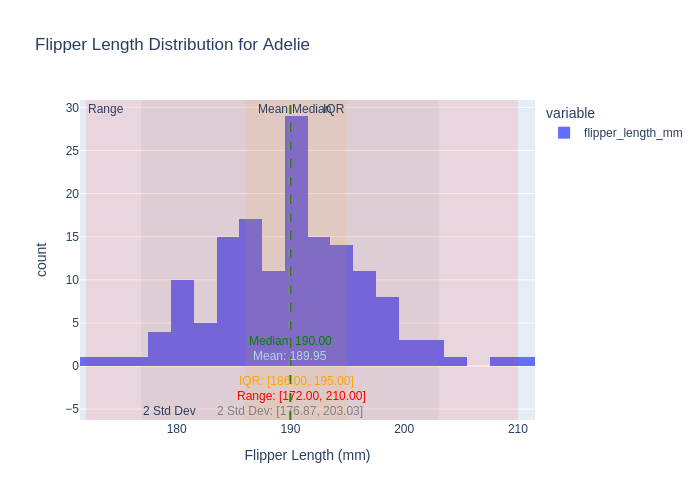

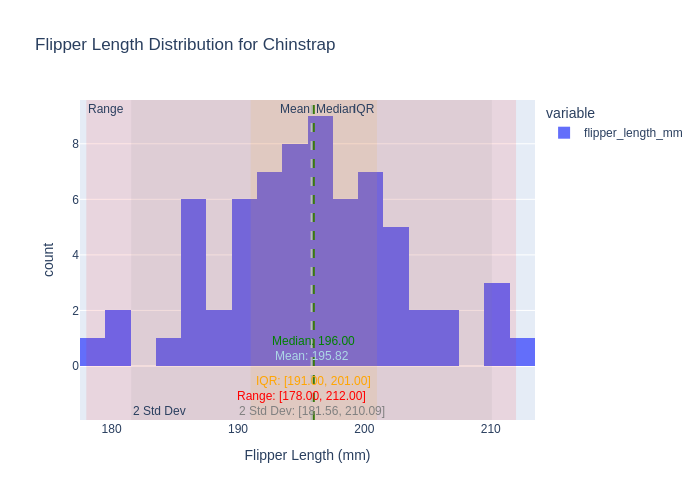

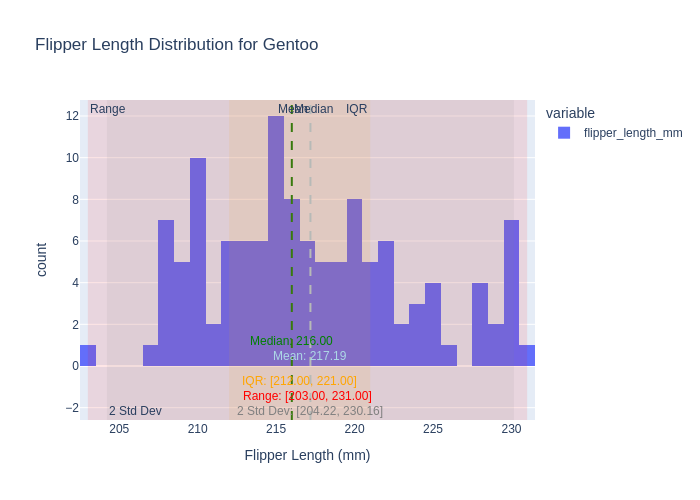

In [25]:
import pandas as pd
import plotly.express as px

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Remove rows with missing values in flipper_length_mm and species
penguins_clean = penguins.dropna(subset=['flipper_length_mm', 'species'])

# List of species
species_list = penguins_clean['species'].unique()

# Create histograms with location and scale markers
for species in species_list:
    # Filter data for the current species
    data_species = penguins_clean[penguins_clean['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean_val = data_species.mean()
    median_val = data_species.median()
    min_val = data_species.min()
    max_val = data_species.max()
    q1 = data_species.quantile(0.25)
    q3 = data_species.quantile(0.75)
    std_val = data_species.std()
    lower_2std = mean_val - 2 * std_val
    upper_2std = mean_val + 2 * std_val
    
    # Create histogram
    fig = px.histogram(data_species, nbins=30, title=f'Flipper Length Distribution for {species}',
                       labels={'value': 'Flipper Length (mm)'})
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean_val, line=dict(color='lightblue', dash='dash'), annotation_text='Mean', annotation_position="top left")
    fig.add_vline(x=median_val, line=dict(color='green', dash='dash'), annotation_text='Median', annotation_position="top right")
    
    # Add vertical rectangles for range, IQR, and two standard deviations
    fig.add_vrect(x0=min_val, x1=max_val, line_width=0, fillcolor="red", opacity=0.1, annotation_text="Range", annotation_position="top left")
    fig.add_vrect(x0=q1, x1=q3, line_width=0, fillcolor="orange", opacity=0.1, annotation_text="IQR", annotation_position="top right")
    fig.add_vrect(x0=lower_2std, x1=upper_2std, line_width=0, fillcolor="grey", opacity=0.1, annotation_text="2 Std Dev", annotation_position="bottom left")
    
    # Add annotations for each statistic
    fig.add_annotation(x=mean_val, y=0, text=f'Mean: {mean_val:.2f}', showarrow=False, yshift=10, font=dict(color="lightblue"))
    fig.add_annotation(x=median_val, y=0, text=f'Median: {median_val:.2f}', showarrow=False, yshift=25, font=dict(color="green"))
    fig.add_annotation(x=(min_val + max_val) / 2, y=0, text=f'Range: [{min_val:.2f}, {max_val:.2f}]', showarrow=False, yshift=-30, font=dict(color="red"))
    fig.add_annotation(x=(q1 + q3) / 2, y=0, text=f'IQR: [{q1:.2f}, {q3:.2f}]', showarrow=False, yshift=-15, font=dict(color="orange"))
    fig.add_annotation(x=(lower_2std + upper_2std) / 2, y=0, text=f'2 Std Dev: [{lower_2std:.2f}, {upper_2std:.2f}]', showarrow=False, yshift=-45, font=dict(color="grey"))
    
    # Show plot
    fig.show(renderer="png")


**Question 2**

Line In[28] is the first code that my Chatbot provided me in order to represent the penguins data set as a KDE plot. However, since for the last histogram I had used a funciton to render the histograms as png's I thought I had to do the same here. Yet, after some conversation with my Chatbot, I got to the conclusion that the KDE would automatically display when the link to this Notebook is opened, and that there was no need to call for the file to be in PNG format. That is how after some try and error, I got to the final version of my KDE Plot in line In[34].

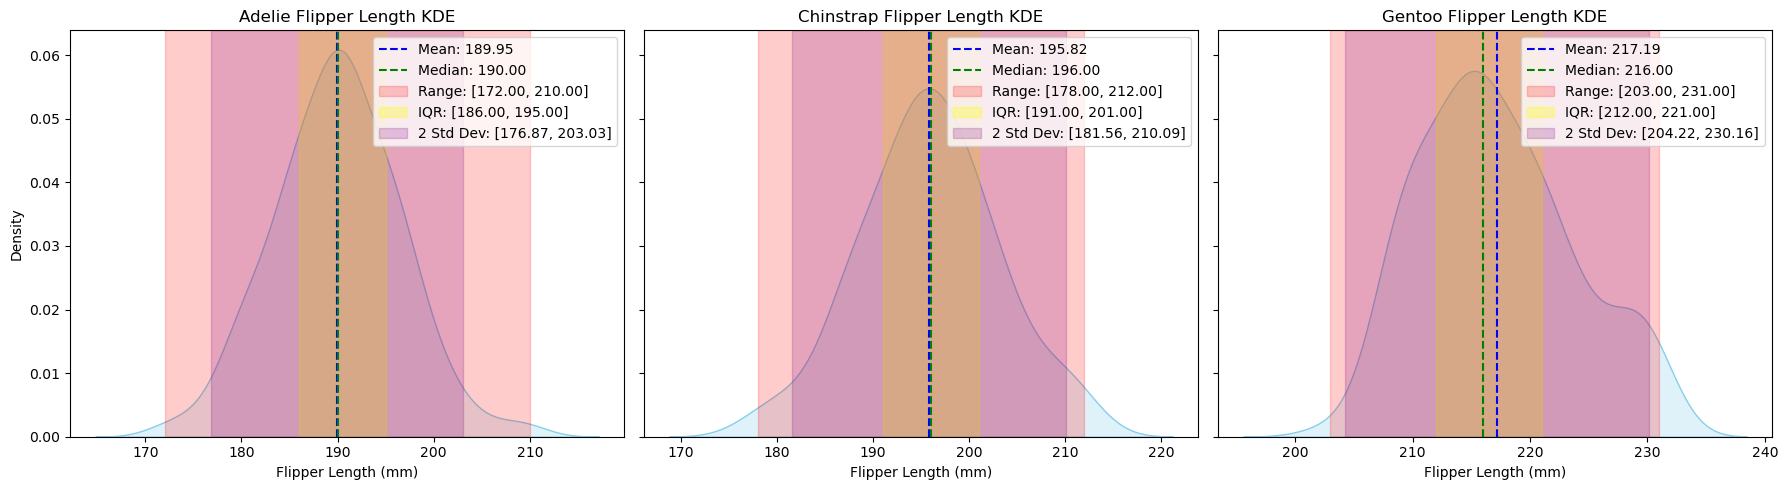

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Remove rows with missing values in flipper_length_mm and species
penguins_clean = penguins.dropna(subset=['flipper_length_mm', 'species'])

# List of species
species_list = penguins_clean['species'].unique()

# Create the figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot KDE for each species
for i, species in enumerate(species_list):
    # Filter data for the current species
    data_species = penguins_clean[penguins_clean['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean_val = data_species.mean()
    median_val = data_species.median()
    min_val = data_species.min()
    max_val = data_species.max()
    q1 = data_species.quantile(0.25)
    q3 = data_species.quantile(0.75)
    std_val = data_species.std()
    lower_2std = mean_val - 2 * std_val
    upper_2std = mean_val + 2 * std_val
    
    # Plot KDE
    sns.kdeplot(data_species, ax=axes[i], fill=True, color='skyblue')
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean_val, color='blue', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    
    # Add shaded regions for range, IQR, and two standard deviations
    axes[i].axvspan(min_val, max_val, color='red', alpha=0.2, label=f'Range: [{min_val:.2f}, {max_val:.2f}]')
    axes[i].axvspan(q1, q3, color='yellow', alpha=0.3, label=f'IQR: [{q1:.2f}, {q3:.2f}]')
    axes[i].axvspan(lower_2std, upper_2std, color='purple', alpha=0.2, label=f'2 Std Dev: [{lower_2std:.2f}, {upper_2std:.2f}]')
    
    # Set title and labels
    axes[i].set_title(f'{species} Flipper Length KDE')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate and save KDE plots as a PNG file
def render_kde_plots_to_png(filename="kde_penguins.png"):
    # Load the penguins dataset
    penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

    # Remove rows with missing values in flipper_length_mm and species
    penguins_clean = penguins.dropna(subset=['flipper_length_mm', 'species'])

    # Convert flipper_length_mm to numeric (just in case there are any hidden issues)
    penguins_clean['flipper_length_mm'] = pd.to_numeric(penguins_clean['flipper_length_mm'], errors='coerce')

    # List of species
    species_list = penguins_clean['species'].unique()

    # Create the figure with 3 subplots in a row
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    # Plot KDE for each species
    for i, species in enumerate(species_list):
        # Filter data for the current species
        data_species = penguins_clean[penguins_clean['species'] == species]['flipper_length_mm']

        # Calculate statistics
        mean_val = data_species.mean()
        median_val = data_species.median()
        min_val = data_species.min()
        max_val = data_species.max()
        q1 = data_species.quantile(0.25)
        q3 = data_species.quantile(0.75)
        std_val = data_species.std()
        lower_2std = mean_val - 2 * std_val
        upper_2std = mean_val + 2 * std_val

        # Plot KDE
        sns.kdeplot(data_species, ax=axes[i], fill=True, color='skyblue')

        # Add vertical lines for mean and median
        axes[i].axvline(mean_val, color='blue', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')

        # Add shaded regions for range, IQR, and two standard deviations
        axes[i].axvspan(min_val, max_val, color='red', alpha=0.2, label=f'Range: [{min_val:.2f}, {max_val:.2f}]')
        axes[i].axvspan(q1, q3, color='yellow', alpha=0.3, label=f'IQR: [{q1:.2f}, {q3:.2f}]')
        axes[i].axvspan(lower_2std, upper_2std, color='purple', alpha=0.2, label=f'2 Std Dev: [{lower_2std:.2f}, {upper_2std:.2f}]')

        # Set title and labels
        axes[i].set_title(f'{species} Flipper Length KDE')
        axes[i].set_xlabel('Flipper Length (mm)')
        axes[i].legend()

    # Adjust layout
    plt.tight_layout()

    # Save the figure as a PNG file
    plt.savefig(filename, format='png')
    plt.close()

# Call the function to render and save the plot as a PNG file
render_kde_plots_to_png()


/tmp/ipykernel_53/2568599602.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate and save KDE plots as a PNG file
def render_kde_plots_to_png(filename="kde_penguins.png"):
    # Load the penguins dataset
    penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

    # Remove rows with missing values in flipper_length_mm and species
    penguins_clean = penguins.dropna(subset=['flipper_length_mm', 'species']).copy()

    # Convert flipper_length_mm to numeric (just in case there are any hidden issues)
    penguins_clean.loc[:, 'flipper_length_mm'] = pd.to_numeric(penguins_clean['flipper_length_mm'], errors='coerce')

    # List of species
    species_list = penguins_clean['species'].unique()

    # Create the figure with 3 subplots in a row
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    # Plot KDE for each species
    for i, species in enumerate(species_list):
        # Filter data for the current species
        data_species = penguins_clean[penguins_clean['species'] == species]['flipper_length_mm']

        # Calculate statistics
        mean_val = data_species.mean()
        median_val = data_species.median()
        min_val = data_species.min()
        max_val = data_species.max()
        q1 = data_species.quantile(0.25)
        q3 = data_species.quantile(0.75)
        std_val = data_species.std()
        lower_2std = mean_val - 2 * std_val
        upper_2std = mean_val + 2 * std_val

        # Plot KDE
        sns.kdeplot(data_species, ax=axes[i], fill=True, color='skyblue')

        # Add vertical lines for mean and median
        axes[i].axvline(mean_val, color='blue', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')

        # Add shaded regions for range, IQR, and two standard deviations
        axes[i].axvspan(min_val, max_val, color='red', alpha=0.2, label=f'Range: [{min_val:.2f}, {max_val:.2f}]')
        axes[i].axvspan(q1, q3, color='yellow', alpha=0.3, label=f'IQR: [{q1:.2f}, {q3:.2f}]')
        axes[i].axvspan(lower_2std, upper_2std, color='purple', alpha=0.2, label=f'2 Std Dev: [{lower_2std:.2f}, {upper_2std:.2f}]')

        # Set title and labels
        axes[i].set_title(f'{species} Flipper Length KDE')
        axes[i].set_xlabel('Flipper Length (mm)')
        axes[i].legend()

    # Adjust layout
    plt.tight_layout()

    # Save the figure as a PNG file
    plt.savefig(filename, format='png')
    plt.close()

# Call the function to render and save the plot as a PNG file
render_kde_plots


NameError: name 'render_kde_plots' is not defined

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate and save KDE plots as a PNG file
def render_kde_plots_to_png(filename="kde_penguins.png"):
    # Load the penguins dataset
    penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

    # Remove rows with missing values in flipper_length_mm and species
    penguins_clean = penguins.dropna(subset=['flipper_length_mm', 'species']).copy()

    # Convert flipper_length_mm to numeric (just in case there are any hidden issues)
    penguins_clean.loc[:, 'flipper_length_mm'] = pd.to_numeric(penguins_clean['flipper_length_mm'], errors='coerce')

    # List of species
    species_list = penguins_clean['species'].unique()

    # Create the figure with 3 subplots in a row
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    # Plot KDE for each species
    for i, species in enumerate(species_list):
        # Filter data for the current species
        data_species = penguins_clean[penguins_clean['species'] == species]['flipper_length_mm']

        # Calculate statistics
        mean_val = data_species.mean()
        median_val = data_species.median()
        min_val = data_species.min()
        max_val = data_species.max()
        q1 = data_species.quantile(0.25)
        q3 = data_species.quantile(0.75)
        std_val = data_species.std()
        lower_2std = mean_val - 2 * std_val
        upper_2std = mean_val + 2 * std_val

        # Plot KDE
        sns.kdeplot(data_species, ax=axes[i], fill=True, color='skyblue')

        # Add vertical lines for mean and median
        axes[i].axvline(mean_val, color='blue', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')

        # Add shaded regions for range, IQR, and two standard deviations
        axes[i].axvspan(min_val, max_val, color='red', alpha=0.2, label=f'Range: [{min_val:.2f}, {max_val:.2f}]')
        axes[i].axvspan(q1, q3, color='yellow', alpha=0.3, label=f'IQR: [{q1:.2f}, {q3:.2f}]')
        axes[i].axvspan(lower_2std, upper_2std, color='purple', alpha=0.2, label=f'2 Std Dev: [{lower_2std:.2f}, {upper_2std:.2f}]')

        # Set title and labels
        axes[i].set_title(f'{species} Flipper Length KDE')
        axes[i].set_xlabel('Flipper Length (mm)')
        axes[i].legend()

    # Adjust layout
    plt.tight_layout()

    # Save the figure as a PNG file
    plt.savefig(filename, format='png')
    plt.close()

# Call the function to render and save the plot as a PNG file
render_kde_plots_to_png()

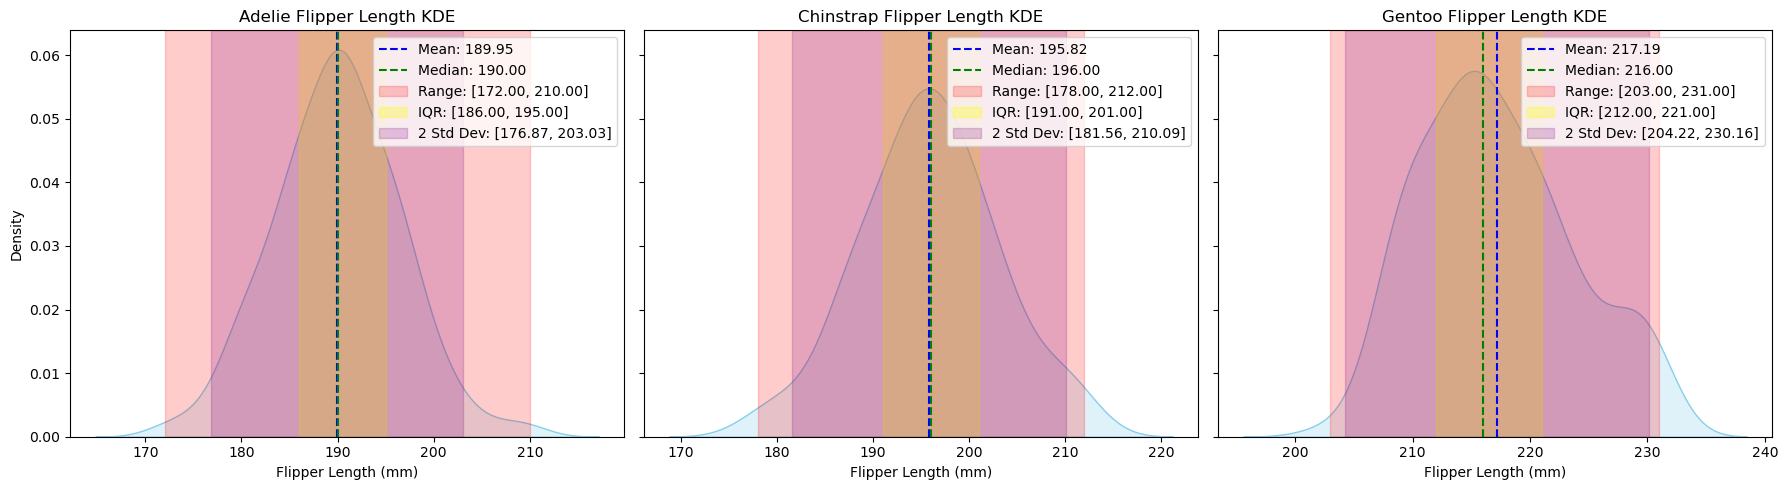

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Remove rows with missing values in flipper_length_mm and species
penguins_clean = penguins.dropna(subset=['flipper_length_mm', 'species']).copy()

# Convert flipper_length_mm to numeric (just in case there are any hidden issues)
penguins_clean.loc[:, 'flipper_length_mm'] = pd.to_numeric(penguins_clean['flipper_length_mm'], errors='coerce')

# List of species
species_list = penguins_clean['species'].unique()

# Create the figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot KDE for each species
for i, species in enumerate(species_list):
    # Filter data for the current species
    data_species = penguins_clean[penguins_clean['species'] == species]['flipper_length_mm']

    # Calculate statistics
    mean_val = data_species.mean()
    median_val = data_species.median()
    min_val = data_species.min()
    max_val = data_species.max()
    q1 = data_species.quantile(0.25)
    q3 = data_species.quantile(0.75)
    std_val = data_species.std()
    lower_2std = mean_val - 2 * std_val
    upper_2std = mean_val + 2 * std_val

    # Plot KDE
    sns.kdeplot(data_species, ax=axes[i], fill=True, color='skyblue')

    # Add vertical lines for mean and median
    axes[i].axvline(mean_val, color='blue', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')

    # Add shaded regions for range, IQR, and two standard deviations
    axes[i].axvspan(min_val, max_val, color='red', alpha=0.2, label=f'Range: [{min_val:.2f}, {max_val:.2f}]')
    axes[i].axvspan(q1, q3, color='yellow', alpha=0.3, label=f'IQR: [{q1:.2f}, {q3:.2f}]')
    axes[i].axvspan(lower_2std, upper_2std, color='purple', alpha=0.2, label=f'2 Std Dev: [{lower_2std:.2f}, {upper_2std:.2f}]')

    # Set title and labels
    axes[i].set_title(f'{species} Flipper Length KDE')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# The plot will automatically be displayed inline in Jupyter
plt.show()


**Questions 1 and 2 Chatbot Summaries**

*Chatbot Summary (Written):*
In this session, we focused on generating KDE plots and visualizations for the penguins dataset using both Plotly and Seaborn. Here's a summary of our interaction:

Plotly Histogram with Annotations: We began by creating Plotly histograms of flipper_length_mm for each penguin species, with vertical lines for the mean and median, and shaded regions for the range, interquartile range (IQR), and two standard deviations from the mean. We added annotations to describe these statistics on the plot.
Seaborn KDE Plots: You then asked to switch to Seaborn to create KDE plots, arranged in a row of three plots. We used Matplotlib to set up a grid and visualized the KDE along with lines and shaded regions for mean, median, range, IQR, and two standard deviations.
Saving Plots as PNG: I provided a function to save these KDE plots as a PNG file. We encountered a warning (SettingWithCopyWarning) related to how we handled DataFrame slicing, which was resolved using .loc[] and .copy().
Displaying Plots in Jupyter: You asked about whether the KDE plots could display in Jupyter without saving them as a PNG file. I confirmed that Jupyter automatically shows plots inline, and provided code without the need for a function, using plt.show() to display the plots.
Throughout the session, we resolved errors related to function calls, warnings, and code execution, ensuring that the visualizations worked smoothly in both environments (Plotly and Seaborn).

Let me know if you need further assistance or clarification!


*Chatbot Link:*
https://chatgpt.com/share/66f61c30-3610-8002-80e2-c14583a3ac8f

**Question 3**

After having chatted with my Chatbot, I came to the conclusion that I like by far more the box plots than the other two methods of visualization. I think is more efficient and easy to read when handling large data sets, while it also labels exactly where all of the differnet numerical informaiton is located in the data set such as mean, median, quartiles, and more. Although I learned that this method does not really show the distribution of the data, I think when comparing categories it is a great way resources. Additionally, I do know that there is a function where you can call for the all of the values to be shown as points in the box plot, which eliminated the con of this method not showing distribution of the data in a visual way. 
As someone who is just beggining to work and analyze data sets, I find this the best method to clearly visualize the relevant values I need. 

Below is the Chatbot summary and the link to the conversation that led me to my personal preference and raitonale conclusion. 

*Chatbot summary:*
Here's a summary of our interaction:

Visualizations Analysis: You shared insights into differences and similarities between box plots, histograms, and KDE plots. I added additional details:
Box plots summarize key statistics and highlight outliers but don't reveal the full distribution shape.
Histograms show frequency but can vary based on bin size and don’t handle outliers well.
KDE plots offer smooth representations of distributions but can be sensitive to the smoothing parameter.
Pros and Cons: You requested the top 5 pros and cons of each visualization method, and I outlined the following:
Box plots: Efficient for summary stats and outlier detection, but lack detailed distribution information.
Histograms: Clear for frequency representation but sensitive to bin size and can hide exact values.
KDE plots: Smooth and visually appealing, but over-smoothing or bandwidth sensitivity can hide data details.
This interaction deepened your understanding of these visualization techniques, helping you weigh the strengths and weaknesses for different analysis scenarios.

*Chatbot link:*
https://chatgpt.com/share/66f61f94-4c1c-8002-8d72-6424d0ae50c9

**Question 4**

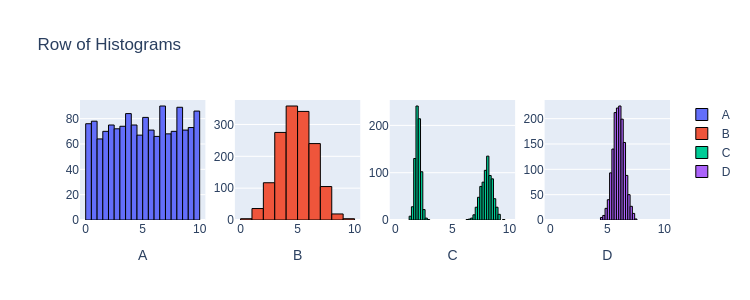

In [37]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

**Question 4.1-4.4:**
1. Similar means and variances: Histograms B and C 
2. Similar means but quite different variances: Histograms A and B or also A and C 
3. Similar variances but quite different means: Histograms B and D 
4. Quite different means and quite different variances: Histograms A and B or also A and D 

**Question 5**
*Relationship between mean and median:*
Both of these variables represent the middle of the data being analyzed. Althoug they are not the same since the mean is the average value calculated by adding all of the values of the data analyzed and then dividing that result between the number of data being analyzed. While the median just refers to the value that is in the middle, when the data is organized from lowest ot higest value. 
Their relationships is that when the value of both is similar almost the same, then I can know that the data is symmetrical. While when the data is unbalanced and unevenly distributed, then by looking at a visualizaiton of the data I can know which value will be greater than the other. 
*Relationship between right and left skeweness:*
These type of skeweness represent outliers in the data.The skeweness really affects the mean, since it is the one being more visually altered in value, rather than the median. However both are affected.
The skewenees happens when the data is not symmetrical and it has extreme values that can be either really high or really low, and depending on what the values are, then the meand and the median will be affected. 
- When the data is right skewed it means that the mean is bigger than the median, and this is shown by the data set having a longer right end.It happens when few large values make the mean to be higher and then it pulls the end of the distribution more to the right. 
- When the data is left skewed, then the median is bigger than the mean, and it is identified by the data set having a longer left end. It presents when there are more smaller values in the data, thus making the mean to be less than the median.  

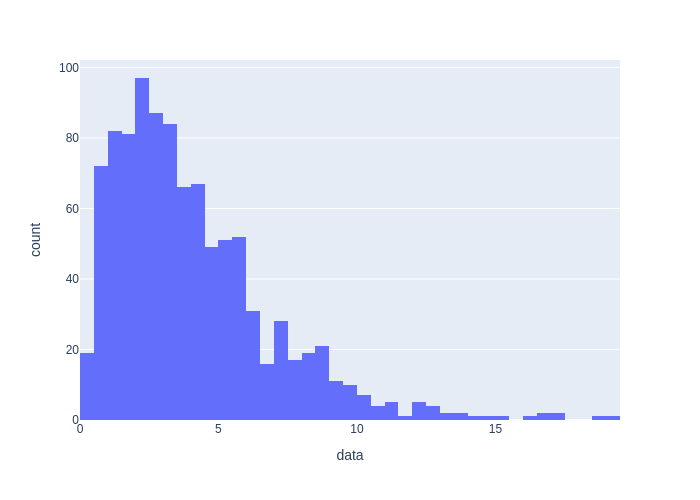

array([3.39067933])

In [48]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
fig1.show(renderer="png")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
sample1.mean()
np.quantile(sample1, [0.5]) # median

By looking at this histogram it is clear that this is a right skewed diagram because it has a longer right tail. This means that the in this data set, the mean will be greater than the median due to the few outliers in the right that will make the average to be higher than what the value in the middle(median) will be. This is also conclude thorught the fact tha most of the data is stored between 0-6, but at the same timere is are also very little count on the data going from >7. 

*Chatbot link:*

**Question 6**

My interesting data set was provided by my Chatbot and is realted to House Prices, including variables such as priec, bedroom number, year built, square feet, among others


Summary Statistics of House Prices:
            Price   Bedrooms  Bathrooms   SquareFeet    YearBuilt  \
count   10.000000  10.000000  10.000000    10.000000    10.000000   
mean   537.000000   4.000000   2.900000  2200.000000  2003.000000   
std    144.148843   1.054093   0.994429   507.718207    11.343133   
min    300.000000   3.000000   2.000000  1500.000000  1985.000000   
25%    457.500000   3.000000   2.000000  1825.000000  1995.750000   
50%    550.000000   4.000000   3.000000  2200.000000  2002.500000   
75%    642.500000   4.750000   3.000000  2575.000000  2011.500000   
max    720.000000   6.000000   5.000000  3000.000000  2020.000000   

           LotSize  GarageCars  
count    10.000000   10.000000  
mean   6330.000000    2.400000  
std    1144.115379    0.843274  
min    4500.000000    1.000000  
25%    5575.000000    2.000000  
50%    6400.000000    2.000000  
75%    7150.000000    3.000000  
max    8000.000000    4.000000  


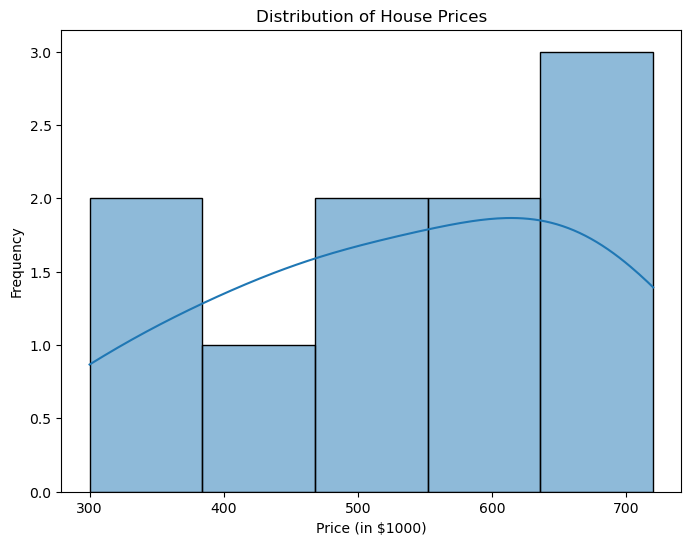

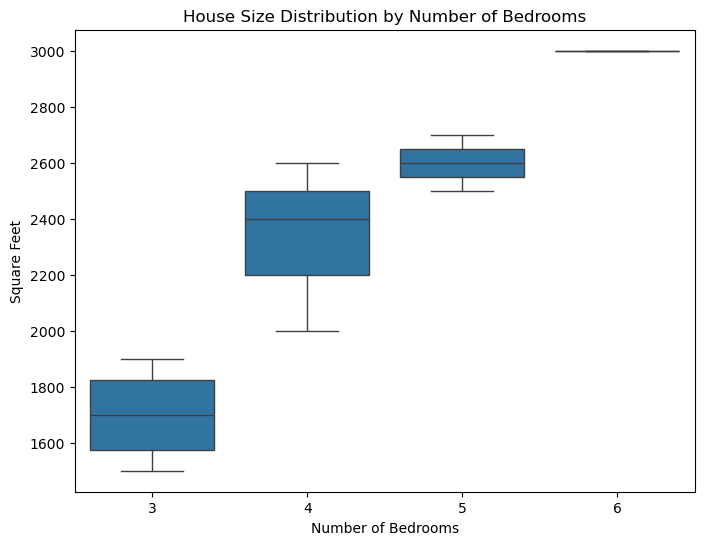

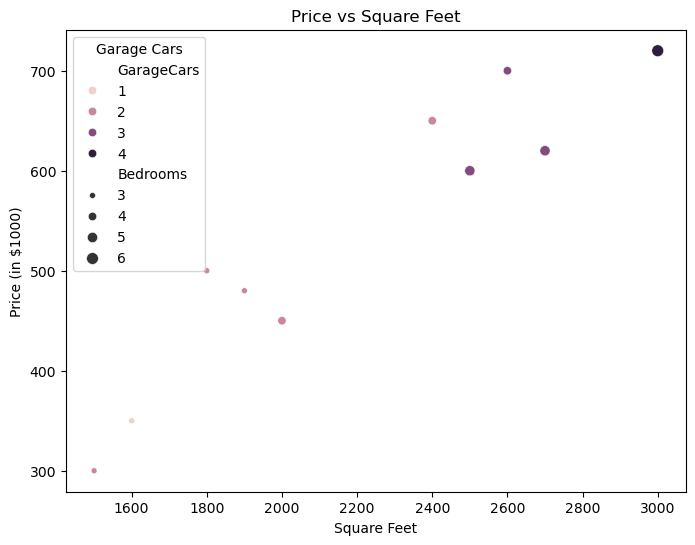

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample dataset
data = {
    'Price': [300, 450, 500, 350, 600, 620, 720, 650, 480, 700],
    'Bedrooms': [3, 4, 3, 3, 5, 5, 6, 4, 3, 4],
    'Bathrooms': [2, 3, 2, 2, 4, 3, 5, 3, 2, 3],
    'SquareFeet': [1500, 2000, 1800, 1600, 2500, 2700, 3000, 2400, 1900, 2600],
    'YearBuilt': [2000, 1995, 2010, 2005, 1990, 1985, 2020, 2015, 1998, 2012],
    'LotSize': [5000, 6000, 5800, 4500, 7000, 7200, 8000, 6800, 5500, 7500],
    'GarageCars': [2, 2, 2, 1, 3, 3, 4, 2, 2, 3]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Summary statistics
summary_stats = df.describe()

# Print summary statistics
print("Summary Statistics of House Prices:")
print(summary_stats)

# Visualization: Histogram of House Prices
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=5, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (in $1000)')
plt.ylabel('Frequency')
plt.show()

# Visualization: Boxplot of Square Feet by Number of Bedrooms
plt.figure(figsize=(8, 6))
sns.boxplot(x='Bedrooms', y='SquareFeet', data=df)
plt.title('House Size Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Square Feet')
plt.show()

# Visualization: Scatter plot of Price vs. Square Feet
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SquareFeet', y='Price', hue='GarageCars', size='Bedrooms', data=df)
plt.title('Price vs Square Feet')
plt.xlabel('Square Feet')
plt.ylabel('Price (in $1000)')
plt.legend(title='Garage Cars')
plt.show()


After using a histogram, box plot and scatter plot diagrams I was able to understand all the data provided in this dataset. 
First, by loooking at the summary of the data, I couldn't really undesrtand or visualize the differences that each category represented, since I just saw a bunch on numbers. However, after looking at the graph I discovered the following: 
- The higher the price is, more amount of square feet will the house be
- There are houses that range on the amount of sq feet but that have the same amount of garages such as houses with 2700sq ft, and houses that have 2500 sq ft. Or even houses that do not even have 1600 sq ft and houses that have 2000 sq ft. 
- There is a much more even distrubiton of house that have 3 bedrooms than the ones that have 6 bedrooms. 

After taking a close look to all of the data I can conlcude the following: 
1. Expected outcomes: when buying a house is really important to look at all of the aspects it includes and that I want it to have, so by looking at all of these visualization methods I can reduce my housing options by looking how many bedrooms and garage spots would I like to pay for, as well as the distribution of prices. This will lead to a better choice when I decide what house I want to buy 
2. Risks involved: there are plenty of other lemetns to take into account such as the location, the amenities, the community, the security, rules, etc... That are crucial when buying ahouse, so just looking at this informaiton would not be enough to make a good decision. Additonally, not all houses are considered, which makes the use of this statistics less useful. 
3. I believe having different types of methods to visaulize this data, and going for a historgram and a box plot is better than using a KDE since it will show exactly what I want to compare, cosnidering I do not really need to know the density or the proportion of the data. 

*Chatbot link:*
https://chatgpt.com/share/66f62549-8678-8002-8346-0d19b060b165